---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [16]:
def answer_one():
    import pandas as pd
    import numpy as np
    
    # get only data (no header/footer) and add columns
    energy = pd.read_excel('Energy Indicators.xls', header=None, usecols=range(2,6), skiprows=18, skipfooter=38)
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    # replace '...' with NaN
    energy.replace('...', np.nan, inplace=True)
    
    # convert petajoules to gigajoules
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000
    
    # get rid of numbers and parentheses
    energy['Country'] = energy['Country'].str.replace(r'\d+','')
    def remove_parens(data):
        i = data.find('(')
        if i > -1: data = data[:i]
        return data.strip()
    energy['Country'] = energy['Country'].apply(remove_parens)
    
    # replace country names per instructions
    names = {"Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.replace({"Country": names},inplace = True)
    
    # get GDP data, skip header rows, and select columns of interest - last 10 years
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    
    # rename specified countries
    names = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran","Hong Kong SAR, China": "Hong Kong"}
    GDP.replace({"Country Name": names}, inplace = True)
    
    # get ScimEn data
    ScimEn = pd.read_excel('scimagojr-3.xlsx')    
    
    # merge the data on country name
    combined = pd.merge(ScimEn, energy, how='inner', on=None, left_on='Country', right_on='Country',
         left_index=False, right_index=False, sort=False,
         copy=True, indicator=False)
    combined = pd.merge(combined, GDP, how='inner', on=None, left_on='Country', right_on='Country Name',
         left_index=False, right_index=False, sort=False,
         copy=True, indicator=False)
    #print(len(combined))
    combined = combined[['Country','Rank','Documents','Citable documents','Citations','Self-citations',
                         'Citations per document','H index','Energy Supply', 'Energy Supply per Capita', 
                         '% Renewable','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
        
    # set index and obtain only countries ranked in top 15
    #combined.reset_index(inplace=True)
    combined.set_index('Country', inplace=True)
    combined = combined.where(combined['Rank'] <= 15).dropna(how='all')
    
    # convert floats columns to ints
    col_to_int = ['Rank','Documents','Citable documents','Citations','Self-citations','H index']
    for col in combined.columns:
        if col in col_to_int:
            combined[col] = combined[col].astype(int)
            
    combined.sort_index(axis=0, inplace=True)
            
    #print(energy[energy['Country'].str.contains("United States")])
    #print('energy')
    #print(energy[energy['Country'] == 'United States'])
    #print('GDP')
    #print(GDP[GDP['Country Name'] == 'United States'])
    #print('ScimEn')
    #print(ScimEn[ScimEn['Country'] == 'United States'])

    #print(ScimEn[ScimEn['Country'].str.contains("Arabia")])
    
    #return combined.loc['United States']
    return combined

answer = answer_one()
print(answer)

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   
Canada                 6      17899              17620     215003   
China                  1     127050             126767     597237   
France                 9      13153              12973     130632   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
Iran                  13       8896               8819      57470   
Italy                 11      10964              10794     111850   
Japan                  3      30504              30287     223024   
Russian Federation     5      18534              18301      34266   
South Korea           10      11983              11923     114675   
Spain                 12       942

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [3]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [13]:
def answer_two():
    import pandas as pd
    import numpy as np
    
    # load the datasets
    energy = pd.read_excel('Energy Indicators.xls', header=None, usecols=range(2,6), skiprows=18, skipfooter=38)
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    # merge the data on country name - inner
    combined = pd.merge(ScimEn, energy, how='inner', on=None, left_on='Country', right_on='Country',
         left_index=True, right_index=True, sort=False,
         copy=True, indicator=False)
    combined = pd.merge(combined, GDP, how='inner', on=None, left_on='Country', right_on='Country Name',
         left_index=True, right_index=False, sort=False,
         copy=True, indicator=False)
    # return the difference between the longest dataset and the merged dataset
    
    # merge the data on country name - outer
    combined2 = pd.merge(ScimEn, energy, how='outer', on=None, left_on='Country', right_on='Country',
         left_index=True, right_index=True, sort=False,
         copy=True, indicator=False)
    combined2 = pd.merge(combined2, GDP, how='outer', on=None, left_on='Country', right_on='Country Name',
         left_index=True, right_index=False, sort=False,
         copy=True, indicator=False)
    
    # return the difference between the longest dataset and the merged dataset
    return int(combined2['Country'].count() - combined['Country'].count())

answer2 = answer_two()
print(answer2)

64


## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [7]:
def answer_three():
    Top15 = answer_one()
    # calculate the mean of the specified columns and place in new column
    Top15['avgGDP'] = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
    Top15.sort(['avgGDP'], ascending=[False], inplace=True)
    avgGDP = Top15['avgGDP']
    # return the new column as a series
    return avgGDP
answer3 = answer_three()
print(answer3)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [8]:
def answer_four():
    Top15 = answer_one()
    # calculate the mean of the specified columns and place in new column
    Top15['avgGDP'] = Top15[['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']].mean(axis=1)
    # sort ascending
    Top15.sort(['avgGDP'], ascending=[False], inplace=True)
    Top15['Change'] = Top15['2015'] - Top15['2006']
    Top15.reset_index(inplace=True)
    
    # return the 5th largest average
    return Top15['Change'].iloc[5]

answer4 = answer_four()
print(answer4)

246702696075.0


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [9]:
def answer_five():
    Top15 = answer_one()
    # return the mean Energy Supply per Capita
    return Top15['Energy Supply per Capita'].mean()
answer5 = answer_five()
print(answer5)

157.6


### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [10]:
def answer_six():
    Top15 = answer_one()
    # return a tuple with the maximum % Renewable and respective country name
    return (Top15['% Renewable'].idxmax(), Top15['% Renewable'].max())
answer6 = answer_six()
print(answer6)

('Brazil', 69.648030000000006)


### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [11]:
def answer_seven():
    Top15 = answer_one()
    # create a new column that is the ratio of Self-Citations to Total Citations
    Top15['Self-citations Ratio'] = Top15['Self-citations']/Top15['Citations']
    # return a tuple with the maximum ratio and respective country name
    return (Top15['Self-citations Ratio'].idxmax(), Top15['Self-citations Ratio'].max())

answer7 = answer_seven()
print(answer7)

('China', 0.68931261793894216)


### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [12]:
def answer_eight():
    Top15 = answer_one()
    # create a column that estimates the population using Energy Supply and Energy Supply per capita
    Top15['Population Est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15.sort(['Population Est'], ascending=[False], inplace=True)
    
    # return the third most populous country according to this estimate
    return Top15.iloc[2, :].name

answer8 = answer_eight()
print(answer8)

United States


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [13]:
def answer_nine():
    Top15 = answer_one()
    # create a column that estimates the population using Energy Supply and Energy Supply per capita
    Top15['Population Est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents']/Top15['Population Est']
    
    # return the correlation between the number of citable documents per capita and the energy supply per capita
    return Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

answer9 = answer_nine()
print(answer9)

0.794001043544


In [12]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
#plot9()

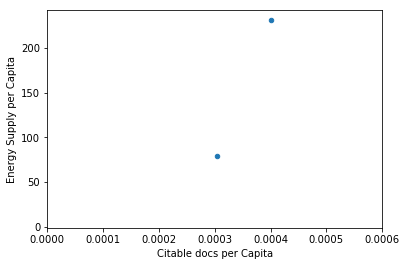

In [81]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [14]:
def answer_ten():
    Top15 = answer_one()
    # create a new column with a 1 if the country's % Renewable value is at or above the median for all 
    # countries in the top 15, and a 0 if the country's % Renewable value is below the median
    med = Top15['% Renewable'].median()
    def code(percentage):
        if percentage < med:
            return 0
        else:
            return 1
    Top15['HighRenew'] = Top15['% Renewable'].apply(lambda x: 0 if x < med else 1)
    
    # return a series named HighRenew whose index is the country name sorted in ascending order of rank
    # this was not sorted as specified but was marked correct
    return Top15['HighRenew']

answer10 = answer_ten()
print(answer10)

Country
Australia             0
Brazil                1
Canada                1
China                 1
France                1
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
United Kingdom        0
United States         0
Name: HighRenew, dtype: int64


### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [20]:
def answer_eleven():
    import pandas as pd
    import numpy as np
    
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    # create a dateframe that displays the sample size (the number of countries in each continent bin), 
    # and the sum, mean, and std deviation for the estimated population of each country
    Top15.reset_index(inplace=True)
    Top15['Continent'] = Top15['Country'].apply(lambda x: ContinentDict[x])
    Top15['Population Est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    
    # set aggregations
    aggregations = {
        'Population Est': {
            'std': 'std',
            'mean':'mean',
            'size': 'count',
            'sum': 'sum'
        }
    }
    # group and create dataframe using aggregations
    Top15_summ = Top15.groupby('Continent').agg(aggregations)
    # when using agg, if you use it on dataframe rather than a series, an additional column level will be added to
    # the column names with the names of the columns in the dataframes - droplevel will convert to single index
    Top15_summ.columns = Top15_summ.columns.droplevel(0)
    # reorder columns for grader
    Top15_summ = Top15_summ[['std','mean','size','sum']]
    
    return Top15_summ

answer11 = answer_eleven()
print(answer11)

                        std          mean  size           sum
Continent                                                    
Asia           6.790979e+08  5.797333e+08     5  2.898666e+09
Australia               NaN  2.331602e+07     1  2.331602e+07
Europe         3.464767e+07  7.632161e+07     6  4.579297e+08
North America  1.996696e+08  1.764276e+08     2  3.528552e+08
South America           NaN  2.059153e+08     1  2.059153e+08


'''### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [16]:
def answer_twelve():
    import pandas as pd
    Top15 = answer_one()
    
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Top15.reset_index(inplace=True)
    Top15['Continent'] = Top15['Country'].apply(lambda x: ContinentDict[x])
    
    # cut % Renewable into 5 bins
    Top15['bins'] = pd.cut(Top15['% Renewable'], 5)
    
    # group Top15 by the Continent, as well as these new % Renewable bins
    # calculate the size of each bin and return the series
    return Top15.groupby(['Continent', 'bins']).size()

answer12 = answer_twelve()
print(answer12)

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64


### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [19]:
def answer_thirteen():
    Top15 = answer_one()
    # calculate the population estimate
    Top15['Population Est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    
    # convert the Population Estimate series to a string with thousands separator (using commas) without rounding
    #Top15['Pop Est Formatted'] = Top15['Population Est'].map('{:,.2f}'.format)
    Top15['Pop Est Formatted'] = Top15['Population Est'].map('{:,}'.format)
    
    return Top15['Pop Est Formatted']

answer13 = answer_thirteen()
print(answer13)

Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
France                  63,837,349.39759036
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
Iran                    77,075,630.25210084
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
South Korea            49,805,429.864253394
Spain                    46,443,396.2264151
United Kingdom         63,870,967.741935484
United States          317,615,384.61538464
Name: Pop Est Formatted, dtype: object


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [79]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


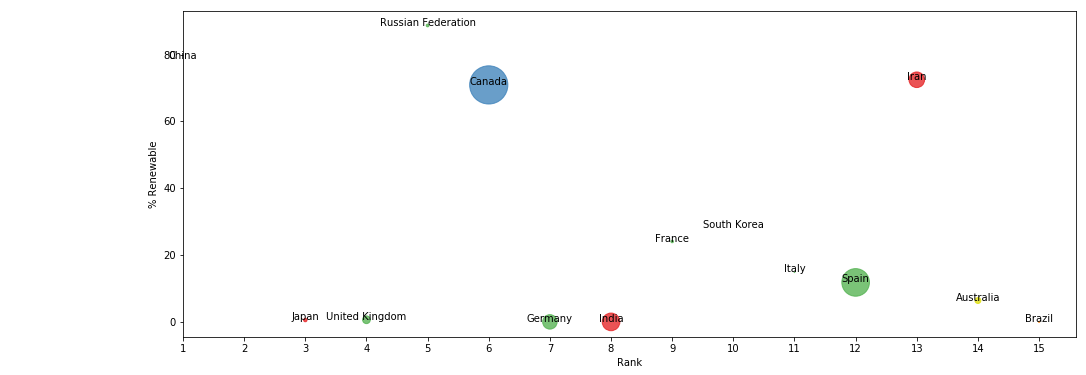

In [82]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!